### Author's Information
1. Name: Kamalini Pradhan
2. Date: 07/16/2024
3. Purpose: Midterm I assignment: Test skills for preparing and cleaning the data, and training and measuring performance metrices for ML models 

# Midterm code starter
In this notebook, we will pull features out of the Kaggle version of the titanic data set.  We separate by sex and do a sample plot.

You can modify the plot as you see fit.

### Pull in the data
#### Question 1A: Read the train.csv data set into `df` and then display the first 10 instances

Later code is expecting to find the data frame in the variable df, so make sure that is what you use throughout.





In [12]:
import pandas as pd
# Load the CSV file
file_name = 'train.csv'
df = pd.read_csv(file_name, sep=",")
male = (df["Sex"] == "male")
female = (df["Sex"] == "female")
survivedM = df[male]["Survived"]
survivedF = df[female]["Survived"]
print(survivedM.count())
print(survivedF.count())
df.head(n=10)

577
314


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Get basic information on the features
#### Question 1B: Use hist() to look at the distribution of the features


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

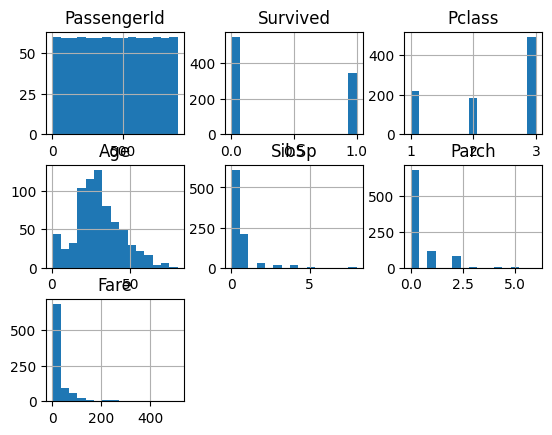

In [13]:
# Question 1A code  [Answer]
df.hist(bins=15)

#### Fix missing values for age
Replace missing values for age with the average (mean).  Do the operation in place.

In [14]:
# check that cleaning is good (You don't need to add anything here, but you may)
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
df.head(n=10)


C:\Users\kamal\AppData\Local\Temp\ipykernel_5176\2297652932.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### Decision Tree classifier

I chose the features for you!

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
X = df[['Age', 'Fare']]
y = df['Survived']
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

DecisionTreeClassifier()

Build and train a decision tree classifier
Print the confusion matrix and scores for the trained model

Use the variable y_predicted to determine the performance of the model.  The graphing code below needs to have it defined in order to work correctly.

In [16]:
# Question 3e, 3f, 3g code  [Answer]
y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is ', recall_score(y,y_pred))
print('F1 is ', f1_score(y, y_pred))

Results for decision tree on training data
 Default settings
Confusion Matrix
[[543   6]
 [ 39 303]]
Accuracy is  0.9494949494949495
Precision is  0.9805825242718447
Recall is  0.8859649122807017
F1 is  0.9308755760368663


### Graph for age vs survival, male/female splits

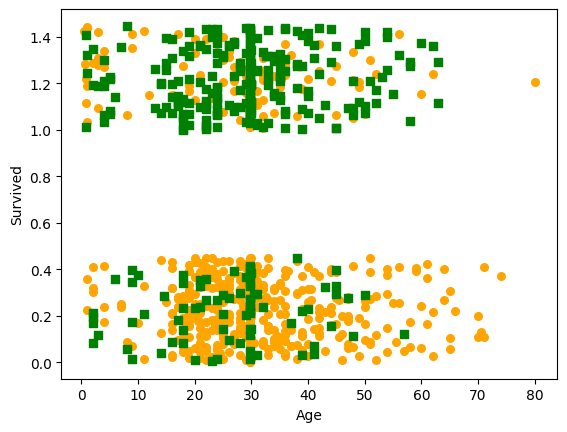

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Differentiate on sex
male = (df["Sex"] == "male")
female = (df["Sex"] == "female")


# Get prediction status from the model
correct = (y - y_pred) == 0   # true/false if a match
correctM = correct[male]
correctF = correct[female]

#Pull out the features for plotting

# Continuous features, so just use directly
ageM = df[male]["Age"]
ageF = df[female]["Age"]

fareM =df[male]["Fare"]
fareF =df[female]["Fare"]

numberMales = len(ageM)
numberFemales = len(ageF)

# Discrete categoies, so smear the values out by a random amount
smear = 0.45

pclassM = df[male]["Pclass"]
pclassM += np.random.random(numberMales)*smear
pclassF = df[female]["Pclass"]
pclassF += np.random.random(numberFemales)*smear

survivedM = df[male]["Survived"]
survivedM += np.random.random(numberMales)*smear
survivedF = df[female]["Survived"] 
survivedF += np.random.random(numberFemales)*smear

sibspM = df[male]["SibSp"]
sibspM += np.random.random(numberMales)*smear
sibspF = df[female]["SibSp"] 
sibspF += np.random.random(numberFemales)*smear

parchM = df[male]["Parch"]
parchM += np.random.random(numberMales)*smear
parchF = df[female]["Parch"] 
parchF += np.random.random(numberFemales)*smear

# Do the plot of age vs survival
plt.xlabel("Age")
plt.ylabel("Survived")

# Scatter plot Male then Female.  (Can reorder if wanted.)
plt.scatter(x=ageM, y=survivedM, marker="o", c="orange", s=30) 
plt.scatter(x=ageF, y=survivedF, marker="s", c="green", s=30) 

#Just mark the ones that are incorrect with X's
#Can comment these two lines out, not critical for the midterm 
plt.scatter(x=ageM[~correctM], y=survivedM[~correctM], marker="x", c="black") 
plt.scatter(x=ageF[~correctF], y=survivedF[~correctF], marker="o", c="black") 

plt.show()
